# KNN

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv("Classified Data", index_col = 0)

In [25]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
# we have columns with unknown name and a Target class.

# KNN classify the class of given test observation by identifying the observation that are nearest to it. The scale of the variable
# actually matters alot. and any variable that are on large scale will have a much larger effect on the distance between 
# observations, and because of this when you are using KNN as a classifier which going to do is standardize everything for the s
# same scale

# KNN is costly 
# It uses only to parameter i.e., K and Distance between observations.
# it is not good for high dimensional data and a categorical data.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [26]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [28]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [29]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[0:-1])

In [30]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [19]:
from sklearn.model_selection import train_test_split

In [33]:
x = df_feat
y = df['TARGET CLASS']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =101)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
pred = knn.predict(x_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


In [44]:
error_rate = [ ]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

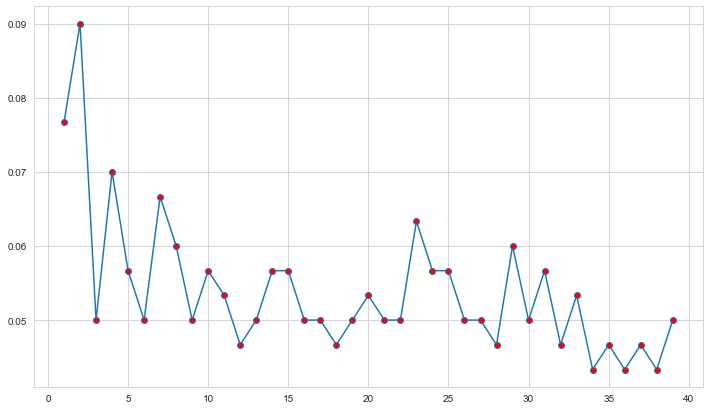

In [49]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
plt.plot(range(1,40),error_rate, marker ='o', markerfacecolor='red')

In [50]:
# we have minimum error_rate at 34,36,38. lets take k= 17 , bcz k = 34 is a large value.

In [51]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [52]:
prediction = knn.predict(x_test)

In [54]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[153   6]
 [  9 132]]


In [ ]:
# our result of prediction increases from 92% to 95%.